# Associating segregation with built-environment metrics

In [1]:
%load_ext autoreload
%autoreload 2
%cd D:\mobi-social-segregation-se

D:\mobi-social-segregation-se


In [21]:
# Load libs
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [18]:
df = gpd.read_file('results/mobi_seg_spatio_static_built_env.geojson')
df.head()

,weekday,holiday,hex_id,S_income,S_birth_region,S_background,Foreign background,Not Sweden,Lowest income group,S_income_h,...,Foreign background_h,Not Sweden_h,Lowest income group_h,deso,deso_3,num_stops,gsi,hc_count,pop,geometry
0,0,0,86088049fffffff,0.160000,0.640468,0.389810,0.305095,0.239688,0.31,0.053333,...,0.128115,0.106690,0.23,0188A0040,01,5.009817,0.016530,3.0,2287,"POLYGON ((18.60606 59.78091, 18.66705 59.78702..."
1,0,0,86088059fffffff,0.086667,0.697943,0.519950,0.240025,0.201372,0.26,0.033333,...,0.187854,0.155466,0.25,0188A0080,01,2.158927,0.011955,0.0,1235,"POLYGON ((18.32160 59.77558, 18.38253 59.78182..."
2,0,0,86088071fffffff,0.084969,0.856739,0.736124,0.129286,0.095226,0.25,0.120000,...,0.098007,0.078627,0.30,0188A0180,01,1.024106,0.006754,0.0,1806,"POLYGON ((18.74973 60.10015, 18.81113 60.10617..."
3,0,0,860880737ffffff,0.253333,0.664582,0.465207,0.267396,0.223612,0.36,0.060000,...,0.126846,0.099044,0.27,0188A0170,01,2.629462,0.011788,1.0,1151,"POLYGON ((18.56566 60.08194, 18.62700 60.08804..."
4,0,0,860880787ffffff,0.160000,0.795806,0.672258,0.163871,0.136129,0.30,0.120000,...,0.098007,0.078627,0.30,0188A0180,01,2.131248,0.006873,1.0,1806,"POLYGON ((18.79018 60.01053, 18.85148 60.01653..."


## 1. Correlation analysis
Non-holiday weekdays' results.

In [19]:
df = df.loc[(df['weekday'] == 1) & (df['holiday'] == 0), :]
cols = [x for x in df.columns if x not in ('deso', 'deso_3', 'hex_id', 'weekday', 'holiday')]

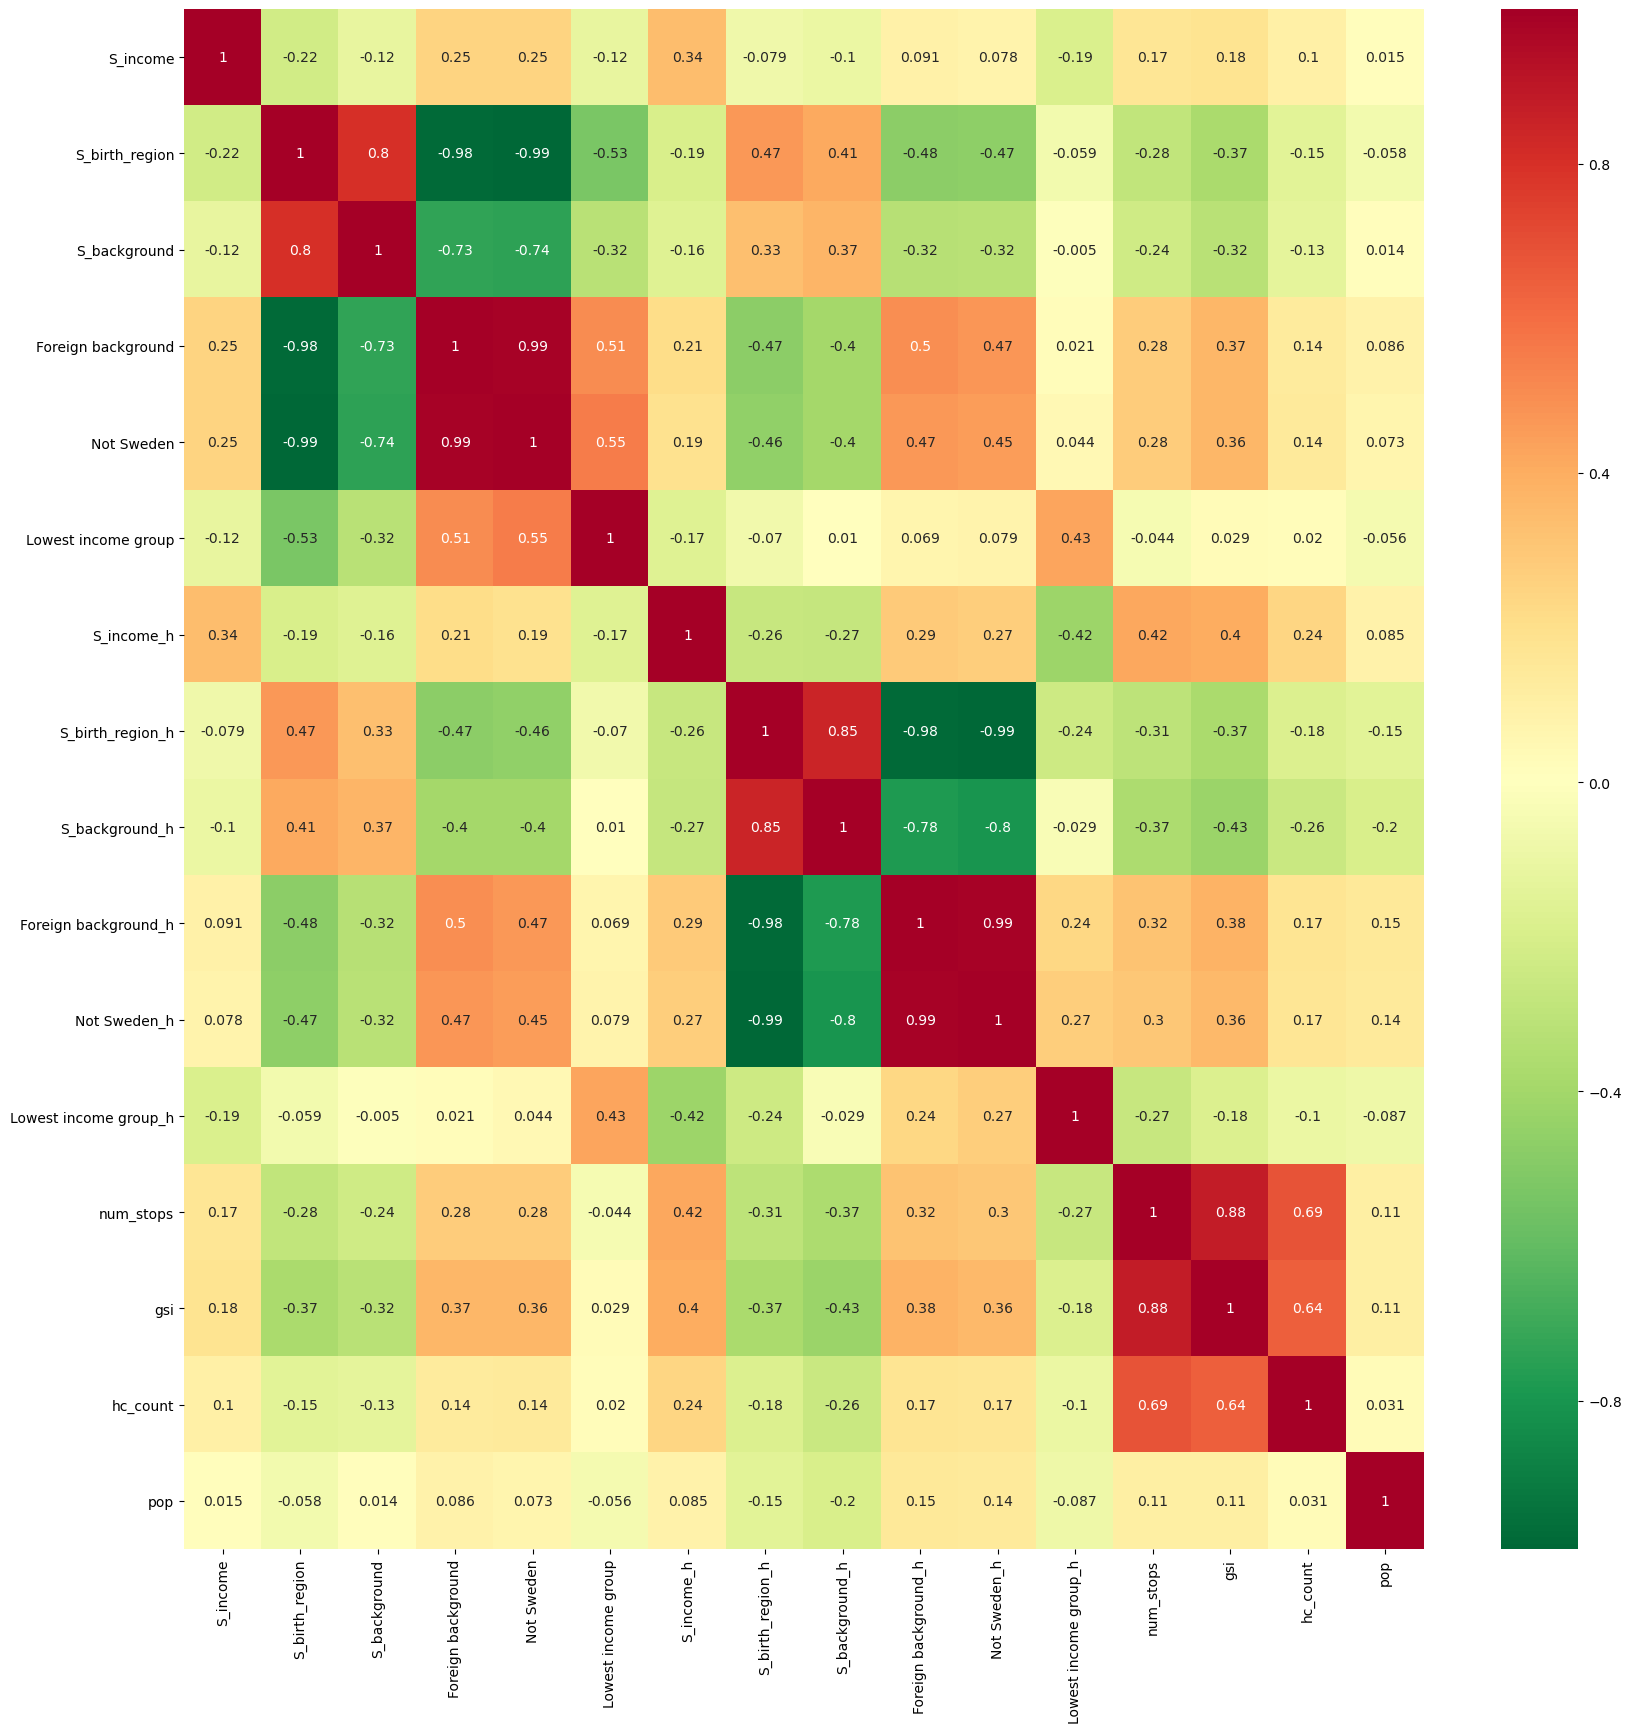

In [22]:
#get correlations of each features in dataset
corrmat = df[cols].corr()
top_corr_features = corrmat.index
matplotlib.rc_file_defaults()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[cols][top_corr_features].corr(),annot=True,cmap="RdYlGn_r")
plt.show()

### 1.1 Background, income, and built-environment

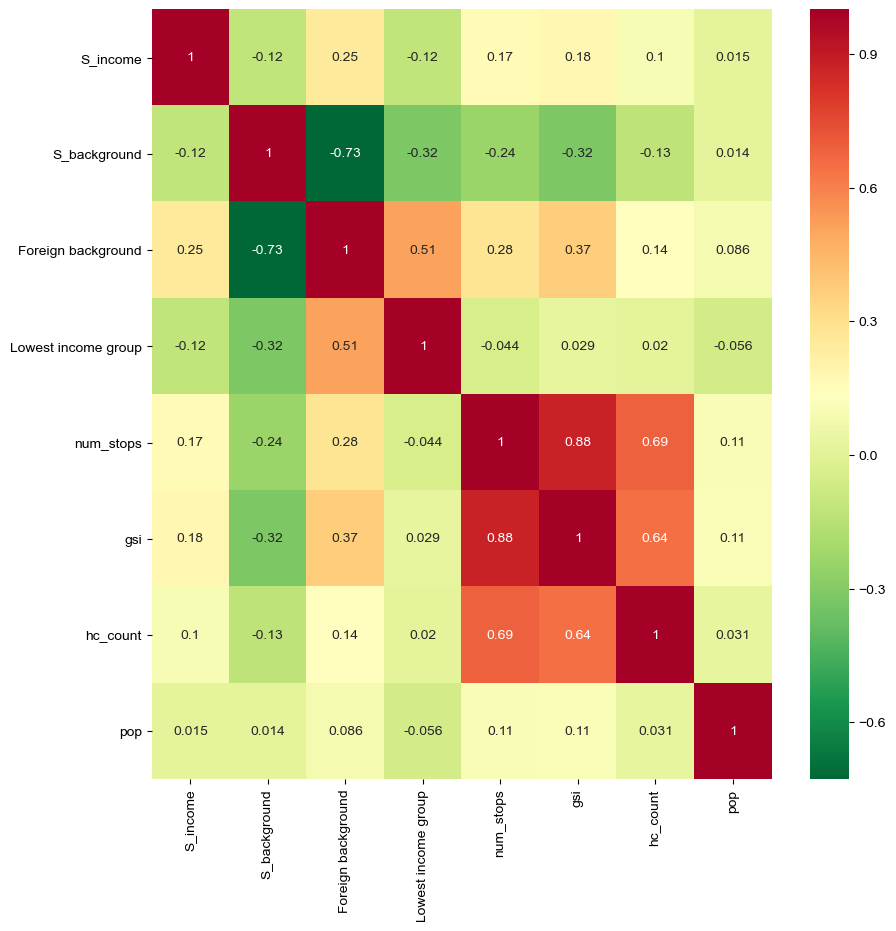

In [25]:
cols_f = ['S_income', 'S_background', 'Foreign background',
       'Lowest income group', 'num_stops', 'gsi', 'hc_count', 'pop']
#get correlations of each features in dataset
corrmat = df[cols_f].corr()
matplotlib.rc_file_defaults()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[cols_f].corr(),annot=True,cmap="RdYlGn_r")
sns.set(font_scale=2)
plt.show() # ta-da!